将鱼图像数据进行操作，使用numpy知识

In [2]:
import numpy as np


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fish = plt.imread('fish.png')

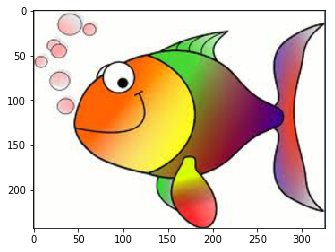

In [4]:
plt.imshow(fish)

In [5]:
fish.shape

(243, 326, 3)

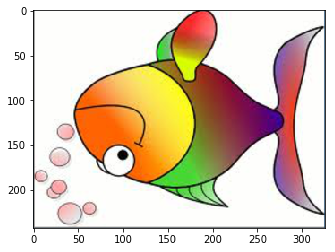

In [6]:
fish2 = fish[::-1]

plt.imshow(fish2)

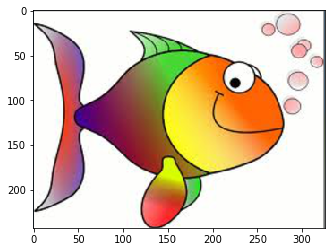

In [7]:
fish3 = fish[::,::-1]
plt.imshow(fish3)

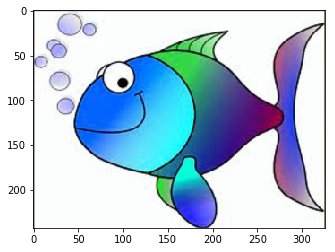

In [8]:
# r g b
# b g r
fish4 = fish[::,::,::-1]
plt.imshow(fish4)

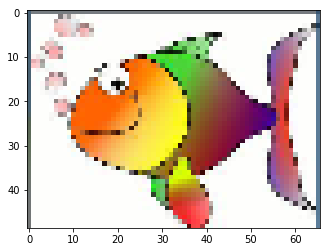

In [9]:
fish5 = fish[::5,::5]
plt.imshow(fish5)

In [10]:
fish6 = fish.copy()

In [12]:
fish

array([[[ 0.29411766,  0.39215687,  0.46666667],
        [ 0.46666667,  0.48627451,  0.49803922],
        [ 0.4627451 ,  0.48627451,  0.50196081],
        ..., 
        [ 0.4627451 ,  0.48235294,  0.49803922],
        [ 0.45882353,  0.47843137,  0.49803922],
        [ 0.21960784,  0.33333334,  0.44313726]],

       [[ 0.29019609,  0.3764706 ,  0.44313726],
        [ 0.627451  ,  0.6156863 ,  0.60784316],
        [ 0.85490197,  0.85490197,  0.84705883],
        ..., 
        [ 0.86274511,  0.85882354,  0.8509804 ],
        [ 0.8509804 ,  0.8509804 ,  0.84313726],
        [ 0.30588236,  0.42352942,  0.52549022]],

       [[ 0.28235295,  0.37254903,  0.43921569],
        [ 0.66666669,  0.66274512,  0.65490198],
        [ 1.        ,  1.        ,  1.        ],
        ..., 
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 0.35686275,  0.47450981,  0.57647061]],

       ..., 
       [[ 0.4509804 ,  0.45882353,  0.45882353],
        

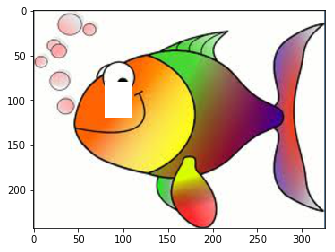

In [20]:
fish6[80:120,80:110] = np.ones((40,30,3))
plt.imshow(fish6)

# Pandas的数据结构



导入pandas：  
三剑客

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import Series,DataFrame

### 1、Series

Series是一种类似于一维数组的对象，由下面两个部分组成：
- values：一组数据（ndarray类型）
- index：相关的数据索引标签

#### 1）Series的创建

两种创建方式：

(1) 由列表或numpy数组创建

    默认索引为0到N-1的整数型索引

In [22]:
n = np.array([0,2,4,6,8])

#Series和ndarray差别，有没有具体的索引
s = Series(n)
s

0    0
1    2
2    4
3    6
4    8
dtype: int64

In [24]:
#Series包含ndarray
#Series功能就会强大，索引，检索方便很多
s.values

array([0, 2, 4, 6, 8])

In [23]:
n

array([0, 2, 4, 6, 8])

    还可以通过设置index参数指定索引

In [25]:
s.index = list('abcde')
s

a    0
b    2
c    4
d    6
e    8
dtype: int64

In [26]:
s.index = ['张三','李四','Michael','sara','lisa']
s

张三         0
李四         2
Michael    4
sara       6
lisa       8
dtype: int64

特别地，由ndarray创建的是引用，而不是副本。对Series元素的改变也会改变原来的ndarray对象中的元素。（列表没有这种情况）

In [28]:
s['张三'] = 100

In [29]:
s

张三         100
李四           2
Michael      4
sara         6
lisa         8
dtype: int64

In [30]:
n

array([100,   2,   4,   6,   8])

(2) 由字典创建

In [42]:
dic = {'a':np.random.randint(0,10,size = (2,3)),
       'b':np.random.randint(0,10,size = (2,3)),
            'c':np.random.randint(0,10,size = (2,3))}

s2 = Series(dic)
s2

a    [[1, 8, 0], [6, 4, 2]]
b    [[2, 7, 8], [3, 7, 5]]
c    [[6, 2, 3], [9, 6, 7]]
dtype: object

============================================

练习1：

使用多种方法创建以下Series，命名为s1：  
语文 150   
数学 150   
英语 150   
理综 300   

============================================

In [49]:
s = Series(data = np.random.randint(0,150,size = 4),index=['语文','数学','英语','Python'])
s

语文        136
数学         69
英语         51
Python    123
dtype: int64

#### 2）Series的索引和切片

可以使用中括号取单个索引（此时返回的是元素类型），或者中括号里一个列表取多个索引（此时返回的仍然是一个Series类型）。分为显示索引和隐式索引：

(1) 显式索引：

    - 使用index中的元素作为索引值
    - 使用.loc[]（推荐）

 注意，此时是闭区间

In [50]:
s['Python']

123

In [59]:
s[['Python','数学']]

Python    123
数学         69
dtype: int64

In [53]:
type(s)

pandas.core.series.Series

In [57]:
s.loc[['Python','数学']]

Python    123
数学         69
dtype: int64

In [56]:
s.loc['Python','语文']

IndexingError: Too many indexers

(2) 隐式索引：

    - 使用整数作为索引值
    - 使用.iloc[]（推荐）

 注意，此时是半开区间

In [64]:
#ndarray 极其相似
s[0]

136

In [63]:
s.iloc[[1,2]]

数学    69
英语    51
dtype: int64

In [65]:
s

语文        136
数学         69
英语         51
Python    123
dtype: int64

In [66]:
s['语文':'英语']

语文    136
数学     69
英语     51
dtype: int64

In [67]:
s.loc['语文':'英语']

语文    136
数学     69
英语     51
dtype: int64

In [68]:
#左闭右开
s.iloc[0:2]

语文    136
数学     69
dtype: int64

============================================

练习2：

使用多种方法对练习1创建的Series s1进行索引和切片：

索引：
数学 150 

切片：
语文 150 
数学 150 
英语 150 

============================================

#### 3）Series的基本概念

可以把Series看成一个定长的有序字典

可以通过shape，size，index,values等得到series的属性

In [69]:
s.shape

(4,)

In [70]:
s.size

4

In [71]:
s.values

array([136,  69,  51, 123])

In [72]:
s.index

Index(['语文', '数学', '英语', 'Python'], dtype='object')

可以通过head(),tail()快速查看Series对象的样式

In [76]:
ph = pd.read_csv('../../data/president_heights.csv')
ph

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [77]:
s_name = ph['name']
type(s_name)

pandas.core.series.Series

In [82]:
s_name.head(2)

0    George Washington
1           John Adams
Name: name, dtype: object

In [81]:
s_name.tail()

37        Ronald Reagan
38    George H. W. Bush
39         Bill Clinton
40       George W. Bush
41         Barack Obama
Name: name, dtype: object

当索引没有对应的值时，可能出现缺失数据显示NaN（not a number）的情况

In [85]:
s = Series(data = ['张三','Sara',None])
s

0      张三
1    Sara
2    None
dtype: object

In [89]:
s = Series(data = ['张三','Sara',np.nan])
s

0      张三
1    Sara
2     NaN
dtype: object

In [90]:
print(s[2])

nan


In [91]:
display(type(None),type(np.nan))

NoneType

float

可以使用pd.isnull()，pd.notnull()，或自带isnull(),notnull()函数检测缺失数据

In [99]:
pd.isnull(s)

0    False
1    False
2     True
dtype: bool

In [94]:
s.isnull()

0    False
1    False
2     True
dtype: bool

In [96]:
s_notnull = s.notnull()

In [97]:
s_notnull

0     True
1     True
2    False
dtype: bool

In [98]:
#过滤掉空值
s[s_notnull]

0      张三
1    Sara
dtype: object

Series对象本身及其实例都有一个name属性

In [101]:
#标识Series数据是什么意思
s.name = '姓名'

In [102]:
s

0      张三
1    Sara
2     NaN
Name: 姓名, dtype: object

In [104]:
ph['height(cm)']

0     189
1     170
2     189
3     163
4     183
5     171
6     185
7     168
8     173
9     183
10    173
11    173
12    175
13    178
14    183
15    193
16    178
17    173
18    174
19    183
20    183
21    168
22    170
23    178
24    182
25    180
26    183
27    178
28    182
29    188
30    175
31    179
32    183
33    193
34    182
35    183
36    177
37    185
38    188
39    188
40    182
41    185
Name: height(cm), dtype: int64

#### 4）Series的运算

(1) 适用于numpy的数组运算也适用于Series

In [105]:
s = Series(data = np.random.randint(0,100,size = 10))
s

0    57
1    64
2     2
3    51
4    85
5    29
6    99
7    28
8     9
9     7
dtype: int64

In [106]:
s + 10

0     67
1     74
2     12
3     61
4     95
5     39
6    109
7     38
8     19
9     17
dtype: int64

(2) Series之间的运算

- 在运算中自动对齐不同索引的数据
- 如果索引不对应，则补NaN

In [110]:
s2 = Series(data = np.random.randint(0,100,size = 5))
s2

0    61
1    10
2    99
3    38
4    81
dtype: int64

In [111]:
#当两个Series进行相加时，如果索引不对应，那么就会填补Nan
# + 算数运算符
s + s2

0    118.0
1     74.0
2    101.0
3     89.0
4    166.0
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
dtype: float64

- 注意：要想保留所有的index，则需要使用.add()函数

In [112]:
np.full((2,5),fill_value=10)

array([[10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10]])

In [113]:
s.add(s2,fill_value=0)

0    118.0
1     74.0
2    101.0
3     89.0
4    166.0
5     29.0
6     99.0
7     28.0
8      9.0
9      7.0
dtype: float64

============================================

练习3：

1. 想一想Series运算和ndarray运算的规则有什么不同？

2. 新建另一个索引包含“文综”的Series s2，并与s2进行多种算术操作。思考如何保存所有数据。

============================================

### 2、DataFrame

DataFrame是一个【表格型】的数据结构，可以看做是【由Series组成的字典】（共用同一个索引）。DataFrame由按一定顺序排列的多列数据组成。设计初衷是将Series的使用场景从一维拓展到多维。DataFrame既有行索引，也有列索引。
- 行索引：index
- 列索引：columns
- 值：values（numpy的二维数组）

#### 1）DataFrame的创建
最常用的方法是传递一个字典来创建。DataFrame以字典的键作为每一【列】的名称，以字典的值（一个数组）作为每一列。

此外，DataFrame会自动加上每一行的索引（和Series一样）。

同Series一样，若传入的列与字典的键不匹配，则相应的值为NaN。


In [115]:
dic = {'name':['张三','石六','Sara'],'age':[22,33,18],'sex':['male','female','male']}
df = DataFrame(dic,columns=['name','age','sex','salary'])
df

,name,age,sex,salary
0,张三,22,male,NaN
1,石六,33,female,NaN
2,Sara,18,male,NaN


In [116]:
data = np.random.randint(0,150,(5,4))
data

array([[ 61,  53,  68,  32],
       [108, 104,  38,  71],
       [108, 118,  33,  43],
       [ 43, 130,  85, 149],
       [ 12,  35, 120,  40]])

In [117]:
#ndarray axis：0,1,2
#DataFrame：行 列
#行：代表样本，列：样本的属性
df2 = DataFrame(data = np.random.randint(0,150,(5,4)),
                columns=['语文','数学','Python','物理'],
               index = list('ABCDE'))
df2

,语文,数学,Python,物理
A,144,46,148,142
B,14,79,103,111
C,3,138,123,141
D,68,119,62,10
E,147,11,89,4


DataFrame属性：values、columns、index、shape

In [119]:
df2.shape

(5, 4)

In [118]:
df2.values

array([[144,  46, 148, 142],
       [ 14,  79, 103, 111],
       [  3, 138, 123, 141],
       [ 68, 119,  62,  10],
       [147,  11,  89,   4]])

============================================

练习4：

根据以下考试成绩表，创建一个DataFrame，命名为df：
```
    张三  李四
语文 150  0
数学 150  0
英语 150  0
理综 300  0
```

============================================

#### 2）DataFrame的索引

(1) 对列进行索引

    - 通过类似字典的方式
    - 通过属性的方式

 可以将DataFrame的列获取为一个Series。返回的Series拥有原DataFrame相同的索引，且name属性也已经设置好了，就是相应的列名。

In [125]:
# 属性的调用形式：df2.xxx
df2.Python

A    148
B    103
C    123
D     62
E     89
Name: Python, dtype: int64

In [126]:
#A 行对于DataFrame而言，是样本，不是属性，不能通过.的方式进行调用
df2.A

AttributeError: 'DataFrame' object has no attribute 'A'

In [123]:
df2[['Python','数学']]

,Python,数学
A,148,46
B,103,79
C,123,138
D,62,119
E,89,11


In [124]:
df2['Python','数学']

KeyError: ('Python', '数学')

In [120]:
df2

,语文,数学,Python,物理
A,144,46,148,142
B,14,79,103,111
C,3,138,123,141
D,68,119,62,10
E,147,11,89,4


(2) 对行进行索引

    - 使用.loc[]加index来进行行索引
    - 使用.iloc[]加整数来进行行索引
    
 同样返回一个Series，index为原来的columns。

In [135]:
#0：检索行--->series,1 就相当于检索列
df2.iloc[0,1]

46

In [138]:
df2.loc['A','Python']

148

In [139]:
df2.loc['A'].loc['Python']

148

In [142]:
df2['Python','A']

KeyError: ('Python', 'A')

In [136]:
df2.iloc[0:2]

,语文,数学,Python,物理
A,144,46,148,142
B,14,79,103,111


In [137]:
df2.loc['A':'C']

,语文,数学,Python,物理
A,144,46,148,142
B,14,79,103,111
C,3,138,123,141


In [129]:
#规则定义
df2.loc[['A','B']]

,语文,数学,Python,物理
A,144,46,148,142
B,14,79,103,111


In [130]:
df2.loc['G']

KeyError: 'the label [G] is not in the [index]'

(3) 对元素索引的方法
    - 使用列索引
    - 使用行索引(iloc[3,1]相当于两个参数;iloc[[3,3]] 里面的[3,3]看做一个参数)
    - 使用values属性（二维numpy数组）

In [143]:
df2.iloc[3,1]

119

In [146]:
df2.iloc[[3,1]]

,语文,数学,Python,物理
D,68,119,62,10
B,14,79,103,111


【注意】
直接用中括号时：
- 索引表示的是列索引
- 切片表示的是行切片

In [147]:
df2['数学']

A     46
B     79
C    138
D    119
E     11
Name: 数学, dtype: int64

In [148]:
df2['A']

KeyError: 'A'

In [149]:
df2['A':'B']

,语文,数学,Python,物理
A,144,46,148,142
B,14,79,103,111


In [150]:
df2.loc['A':'B']

,语文,数学,Python,物理
A,144,46,148,142
B,14,79,103,111


============================================

练习5：

使用多种方法对ddd进行索引和切片，并比较其中的区别

============================================

#### 3）DataFrame的运算

（1） DataFrame之间的运算

同Series一样：

- 在运算中自动对齐不同索引的数据
- 如果索引不对应，则补NaN

创建DataFrame df1 不同人员的各科目成绩，月考一

In [151]:
df1 = DataFrame({'Python':[119,120,110],'数学':[130,118,112],'英语':[90,137,99]},
                index=['张三','王五','李四'])
df1

,Python,数学,英语
张三,119,130,90
王五,120,118,137
李四,110,112,99


创建DataFrame df2 不同人员的各科目成绩，月考二  
有新学生转入

In [152]:
df2 = DataFrame(data = np.random.randint(0,150,size = (4,4)),
                index = ['张三','王五','李四','Michael'],
               columns = ['Python','数学','物理','英语'])
df2

,Python,数学,物理,英语
张三,19,130,87,5
王五,91,45,128,61
李四,81,23,12,130
Michael,26,30,149,24


In [154]:
df1

,Python,数学,英语
张三,119,130,90
王五,120,118,137
李四,110,112,99


In [153]:
# + 生成一个新的DataFrame
df1 + 10

,Python,数学,英语
张三,129,140,100
王五,130,128,147
李四,120,122,109


In [155]:
df1 + df2

,Python,数学,物理,英语
Michael,NaN,NaN,NaN,NaN
张三,138.0,260.0,NaN,95.0
李四,191.0,135.0,NaN,229.0
王五,211.0,163.0,NaN,198.0


下面是Python 操作符与pandas操作函数的对应表：

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


In [157]:
display(df1,df2)

,Python,数学,英语
张三,119,130,90
王五,120,118,137
李四,110,112,99


,Python,数学,物理,英语
张三,19,130,87,5
王五,91,45,128,61
李四,81,23,12,130
Michael,26,30,149,24


In [159]:
df = df1.add(df2,fill_value=0)/2
df

,Python,数学,物理,英语
Michael,13.0,15.0,74.5,12.0
张三,69.0,130.0,43.5,47.5
李四,95.5,67.5,6.0,114.5
王五,105.5,81.5,64.0,99.0


（2） Series与DataFrame之间的运算

【重要】

- 使用Python操作符：以行为单位操作（参数必须是行），对所有行都有效。（类似于numpy中二维数组与一维数组的运算，但可能出现NaN）

- 使用pandas操作函数：

        axis=0：以列为单位操作（参数必须是列），对所有列都有效。
        axis=1：以行为单位操作（参数必须是行），对所有行都有效。

In [168]:
s2

Python     69.0
数学        130.0
物理         43.5
英语         47.5
Name: 张三, dtype: float64

In [169]:
df

,Python,数学,物理,英语
Michael,13.0,15.0,74.5,12.0
张三,69.0,130.0,43.5,47.5
李四,95.5,67.5,6.0,114.5
王五,105.5,81.5,64.0,99.0


In [171]:
#列的数据，加到了每一列上
s2 = df.loc['张三']
df.add(s2,axis = 1)

,Python,数学,物理,英语
Michael,82.0,145.0,118.0,59.5
张三,138.0,260.0,87.0,95.0
李四,164.5,197.5,49.5,162.0
王五,174.5,211.5,107.5,146.5


In [ ]:
#0 行
#1 列

In [166]:
s

Michael     13.0
张三          69.0
李四          95.5
王五         105.5
Name: Python, dtype: float64

In [165]:
#axis = 0代表在行的方向上进行算法操作
#行的数据，添加到每一行
df.add(s,axis = 0)

,Python,数学,物理,英语
Michael,26.0,28.0,87.5,25.0
张三,138.0,199.0,112.5,116.5
李四,191.0,163.0,101.5,210.0
王五,211.0,187.0,169.5,204.5


In [163]:
df

,Python,数学,物理,英语
Michael,13.0,15.0,74.5,12.0
张三,69.0,130.0,43.5,47.5
李四,95.5,67.5,6.0,114.5
王五,105.5,81.5,64.0,99.0


In [160]:
s = df['Python']
s

Michael     13.0
张三          69.0
李四          95.5
王五         105.5
Name: Python, dtype: float64

In [161]:
# s 和 df进行操作
df + s

,Michael,Python,张三,数学,李四,物理,王五,英语
Michael,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
张三,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
李四,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
王五,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


============================================

练习6：

1. 假设ddd是期中考试成绩，ddd2是期末考试成绩，请自由创建ddd2，并将其与ddd相加，求期中期末平均值。

2. 假设张三期中考试数学被发现作弊，要记为0分，如何实现？

3. 李四因为举报张三作弊立功，期中考试所有科目加100分，如何实现？

4. 后来老师发现有一道题出错了，为了安抚学生情绪，给每位学生每个科目都加10分，如何实现？

============================================